In [9]:
# python 3.9.5
from dp_accounting.pld import privacy_loss_distribution
n_data = 10000
batch_size = 1000
n_iter_in_epoch = n_data // batch_size
import numpy as np
import json

def compute_epsilon(n_epochs, epsilon, delta=1e-5):
    standard_deviation = 1
    sensitivity_for_sgd = 1
    if n_epochs == 0:
        return 0
    if epsilon == 0:
        gaussian_pld = privacy_loss_distribution.from_gaussian_mechanism(standard_deviation, sensitivity_for_sgd, sampling_prob=batch_size/n_data, value_discretization_interval=1e-3)
        gaussian_pld = gaussian_pld.self_compose(n_epochs * n_iter_in_epoch)
        return gaussian_pld.get_epsilon_for_delta(delta)
    else:
        sensitivity_for_global = 1
        laplace_pld = privacy_loss_distribution.from_laplace_mechanism(sensitivity_for_global/epsilon, sensitivity_for_global, value_discretization_interval=1e-3)
        gaussian_pld = privacy_loss_distribution.from_gaussian_mechanism(standard_deviation, sensitivity_for_global, sampling_prob=batch_size/n_data, value_discretization_interval=1e-3)
        gaussian_pld = gaussian_pld.self_compose(n_epochs * n_iter_in_epoch)
        composed_laplace_and_gaussian_pld = laplace_pld.compose(gaussian_pld)
        return composed_laplace_and_gaussian_pld.get_epsilon_for_delta(delta)    



def load(save_name, label):
    path = f"/data/results/{dataset}/{data_name}/{training_data_name}/{save_name}/params.json"
    with open(path, "r") as f:
        param = json.load(f)
    if "test_jsss" in param:
        test_jsss = param["test_jsss"]
    else:
        results = param["results"]
        test_jsss = [result[label] for result in results]
    
    return test_jsss

import matplotlib.pyplot as plt
def plot(test_jsss, target, label, x=None):
    jss = [v[target] for v in test_jsss]
    if x is None:
        plt.plot(range(len(jss)), jss, label=label)
    else:
        plt.plot(x, jss, label=label)

def plot_average(test_jsss, label, x=None):
    jss = [np.nanmean(v) for v in test_jsss]
    if x is None:
        plt.plot(range(len(jss)), jss, label=label)
    else:
        plt.plot(x, jss, label=label)


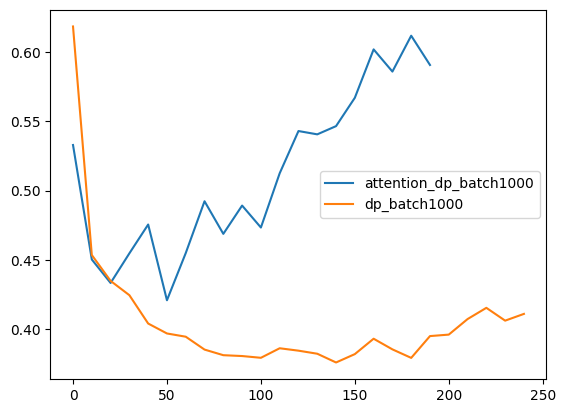

0


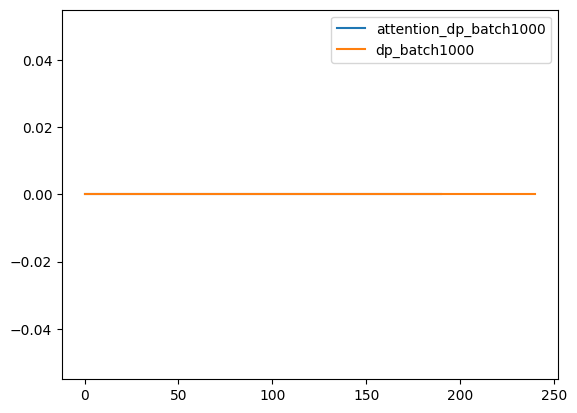

1


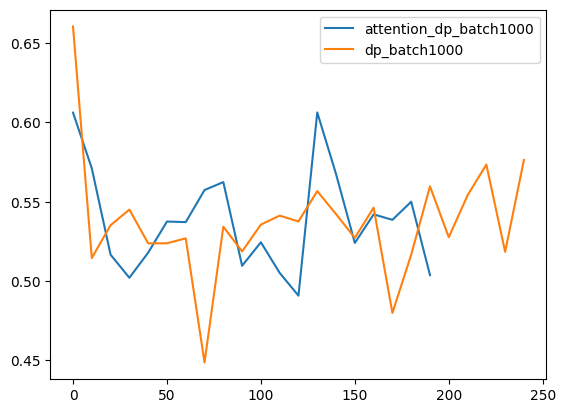

2


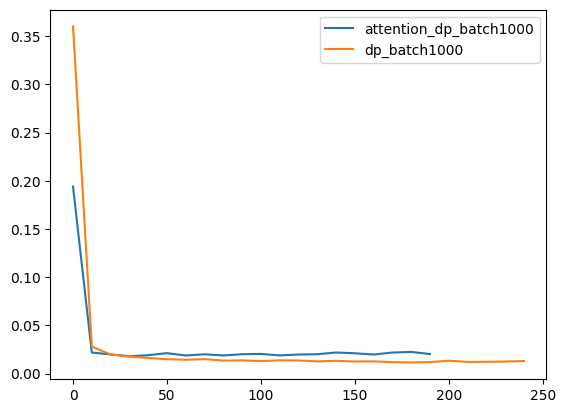

3


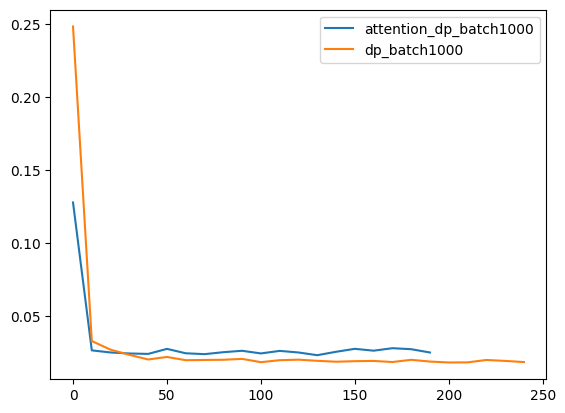

4


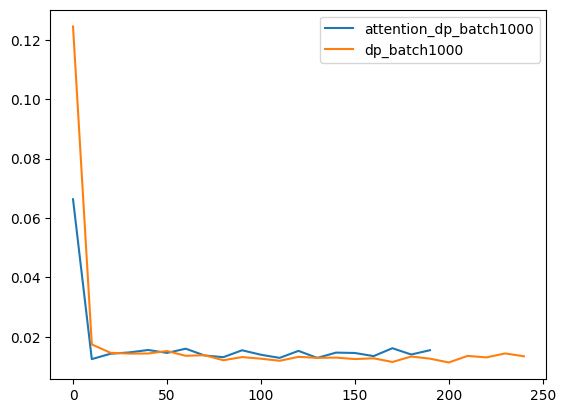

In [13]:
dataset = "peopleflow"
data_name = "100000"
training_data_name = "bin38"

# plot next_location_js
save_names = ["attention_dp_batch1000", "dp_batch1000"]
test_jssss = [load(save_name, "next_location_js") for save_name in save_names]
for test_jsss, save_name in zip(test_jssss, save_names):
    epochs = [v*10 for v in range(len(test_jsss))]
    plot_average(test_jsss, save_name, x=epochs)
plt.legend()
plt.show()

# plot global_js
test_jssss = [load(save_name, "global_js") for save_name in save_names]
targets = [0,1,2,3,4]
for target in targets:
    print(target)
    for test_jsss, save_name in zip(test_jssss, save_names):
        epochs = [v*10 for v in range(len(test_jsss))]
        plot(test_jsss, target, save_name, x=epochs)
    plt.legend()

    plt.show()

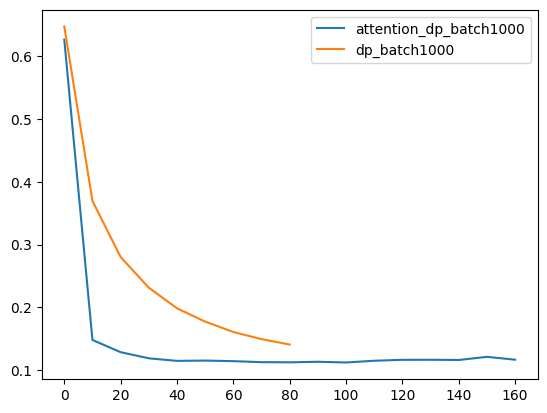

0


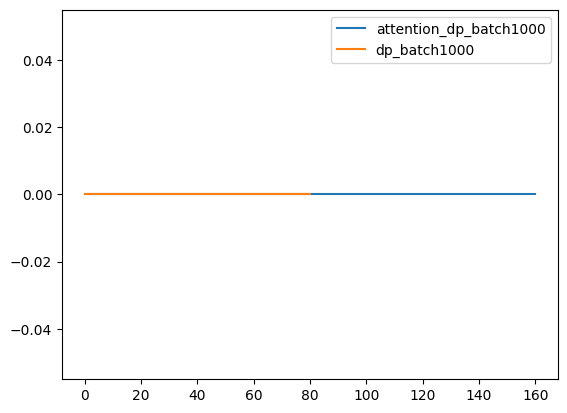

1


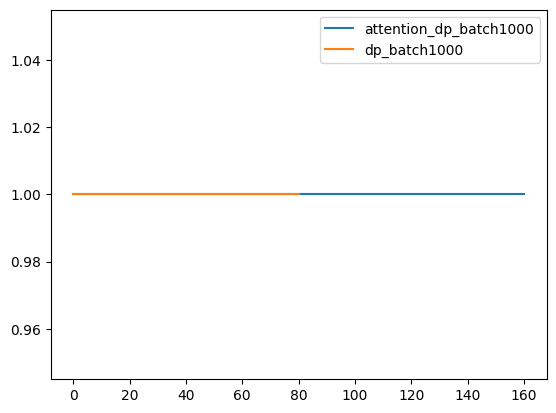

2


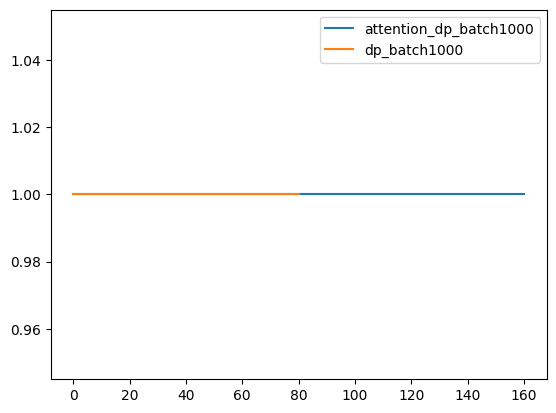

3


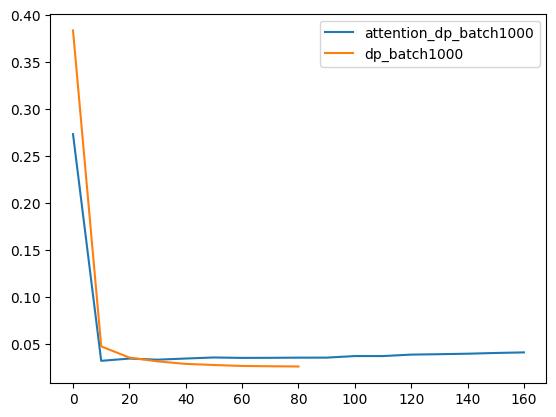

4


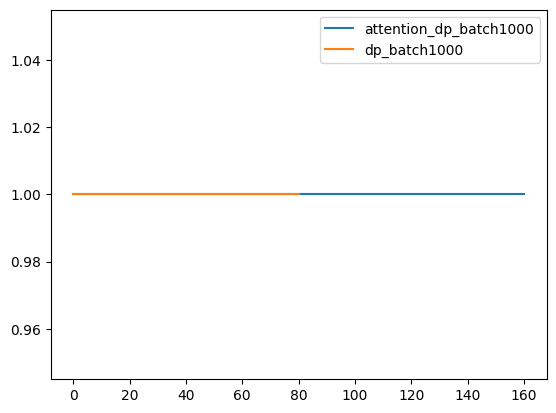

In [14]:
dataset = "chengdu"
data_name = "100000"
training_data_name = "start_end"

# plot next_location_js
save_names = ["attention_dp_batch1000", "dp_batch1000"]
test_jssss = [load(save_name, "next_location_js") for save_name in save_names]
for test_jsss, save_name in zip(test_jssss, save_names):
    epochs = [v*10 for v in range(len(test_jsss))]
    plot_average(test_jsss, save_name, x=epochs)
plt.legend()
plt.show()

# plot global_js
test_jssss = [load(save_name, "global_js") for save_name in save_names]
targets = [0,1,2,3,4]
for target in targets:
    print(target)
    for test_jsss, save_name in zip(test_jssss, save_names):
        epochs = [v*10 for v in range(len(test_jsss))]
        plot(test_jsss, target, save_name, x=epochs)
    plt.legend()

    plt.show()

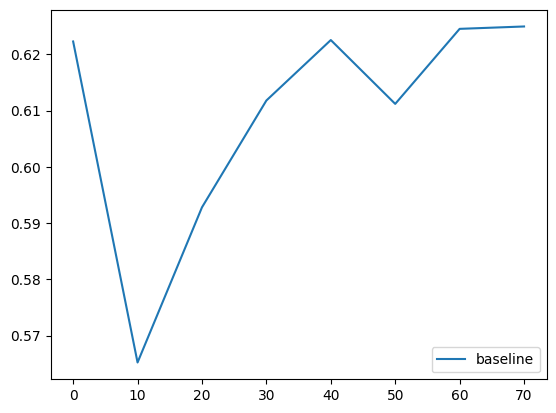

0


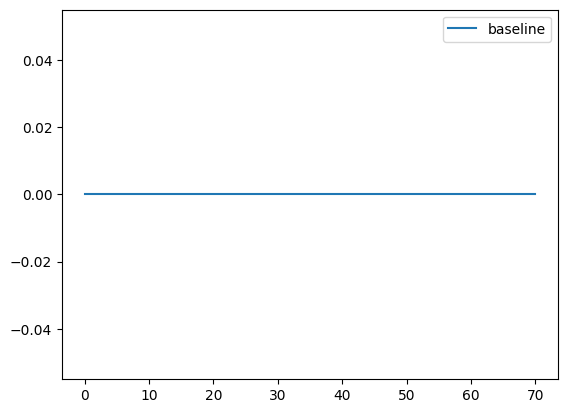

1


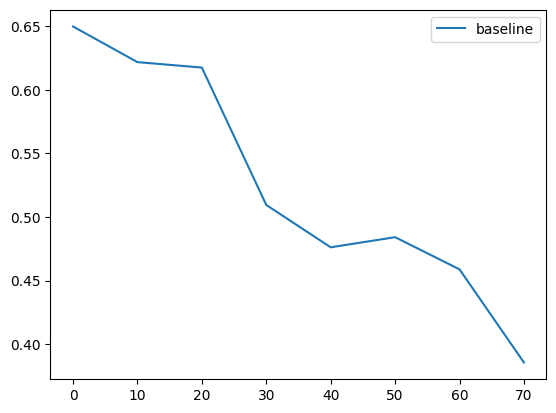

2


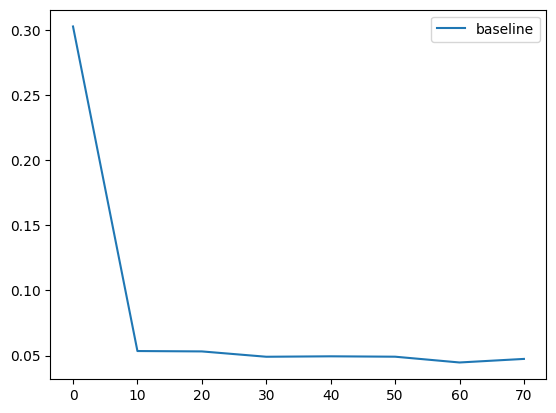

3


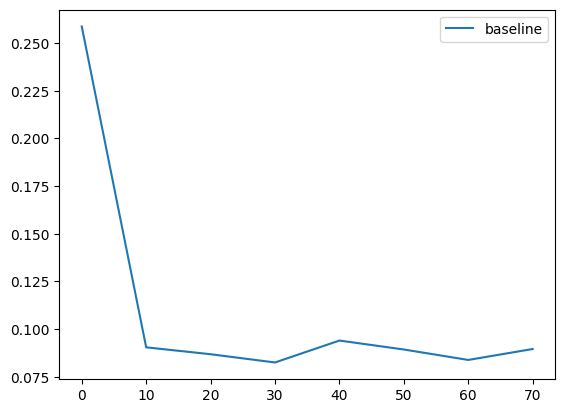

4


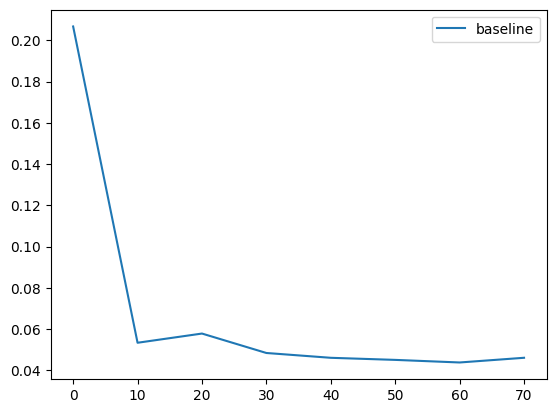

In [16]:
dataset = "peopleflow"
data_name = "10000"
training_data_name = "bin38"

# plot next_location_js
save_names = ["baseline"]
test_jssss = [load(save_name, "next_location_js") for save_name in save_names]
for test_jsss, save_name in zip(test_jssss, save_names):
    epochs = [v*10 for v in range(len(test_jsss))]
    plot_average(test_jsss, save_name, x=epochs)
plt.legend()
plt.show()

# plot global_js
test_jssss = [load(save_name, "global_js") for save_name in save_names]
targets = [0,1,2,3,4]
for target in targets:
    print(target)
    for test_jsss, save_name in zip(test_jssss, save_names):
        epochs = [v*10 for v in range(len(test_jsss))]
        plot(test_jsss, target, save_name, x=epochs)
    plt.legend()

    plt.show()

In [ ]:
import pandas as pd
# original_data_path = "/data/chengdu/raw/trajs_demo.csv"
# df = pd.read_csv(original_data_path, header=None).values
# trajs = [v[0].split()[:-1] for v in df]
# original_trajs = [[int(v)-1 for v in traj] for traj in trajs]


# original_data_path = "/data/chengdu/10000/original_data.csv"
# df = pd.read_csv(original_data_path, header=None).values
# original_trajs = [[int(v) for v in traj if not np.isnan(v)] for traj in df]

original_data_path = "/root/MTNet_Code/MTNet/data/num10000_batch1000/original_trajs.csv"
df = pd.read_csv(original_data_path, header=None).values
original_trajs = [[int(v)-1 for v in traj if v != 0] for traj in df]


# generated_data_path = "/data/results/chengdu/10000/start_end/dp/generated_trajs.csv"
# df = pd.read_csv(generated_data_path, header=None).values
# generated_trajs = [[int(v) for v in traj if not np.isnan(v)] for traj in df]

# find the top 10 locations
top_k = 50
top_base_locations = Counter([traj[0] for traj in original_trajs]).most_common(top_k)
top_base_locations = [location for location, _ in top_base_locations]

distance_matrix = np.load("/data/chengdu/10000/start_end/distance_matrix.npy")

results = []
for i in [0, 10, 20, 30, 40]:
    print(i)
    # generated_data_path = "/root/MTNet_Code/MTNet/samples_10.txt"
    generated_data_path = f"/root/MTNet_Code/MTNet/data/num10000_batch1000/samples_{i}.txt"
    # generated_data_path = f"/root/MTNet_Code/MTNet/data/num240000_batch3000/samples_{i}.txt"
    df = pd.read_csv(generated_data_path, header=None).values
    # remove 0s
    generated_trajs = [[int(v)-1 for v in traj if v != 0] for traj in df]

    results.append(compute_results(original_trajs, generated_trajs))
mtnet_result = [result["destination_js"] for result in results]
